Name 1:Ahmed hany mohamed abdelmonem 



ID:20191310663





Name 2:Yehia ahmed hassan elboudy




ID: 20191311656

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import cv2
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
import numpy as np
from tensorflow.keras import layers,models

LOAD TRAIN DATA

In [ ]:
train_path='/content/drive/MyDrive/base_data/train'

In [ ]:
train=ImageDataGenerator(rescale=1./255,
                              shear_range=0.2,
                              rotation_range=5,
                              zoom_range=0.2,
                              width_shift_range=0.1,
                              height_shift_range=0.1,
                              horizontal_flip=False,
                              vertical_flip=False
)

In [ ]:
train_dataset=train.flow_from_directory(train_path,
                                        target_size=(300,300),
                                     batch_size=32,
                                     shuffle=True,
                                     seed=100,
                                     color_mode='grayscale',
                                     class_mode='binary'
    
)

Found 5229 images belonging to 2 classes.


LOAD VALIDATION DATA

In [ ]:
val_path='/content/drive/MyDrive/base_data/val'

In [ ]:
 val=ImageDataGenerator(rescale=1./255)

In [ ]:
val_dataset=val.flow_from_directory("/content/drive/MyDrive/base_data/val",
                                target_size=(300,300),
                                batch_size=32,
                                shuffle=True,
                                seed=100,
                                color_mode='grayscale',
                                class_mode='binary')

Found 16 images belonging to 2 classes.


LOAD TEST DATA

In [ ]:
test_path='/content/drive/MyDrive/base_data/test'

In [ ]:
test=ImageDataGenerator(rescale=1./255)

In [ ]:
test_dataset=test.flow_from_directory('/content/drive/MyDrive/base_data/test',
                                target_size=(300,300),
                                batch_size=32,
                                shuffle=True,
                                seed=100,
                                color_mode='grayscale',
                                class_mode='binary')

Found 624 images belonging to 2 classes.


VISUALIZING X-RAYS

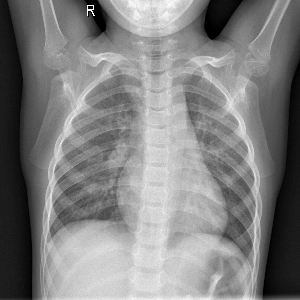

In [ ]:
#normal chest X-ray
img=image.load_img("/content/drive/MyDrive/base_data/train/NORMAL/IM-0115-0001.jpeg",target_size=(300,300))
img

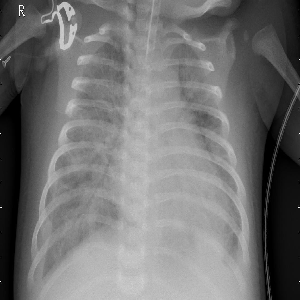

In [ ]:
#pneumonia chest X-ray
img=image.load_img("/content/drive/MyDrive/base_data/train/PNEUMONIA/person1000_bacteria_2931.jpeg",target_size=(300,300))
img

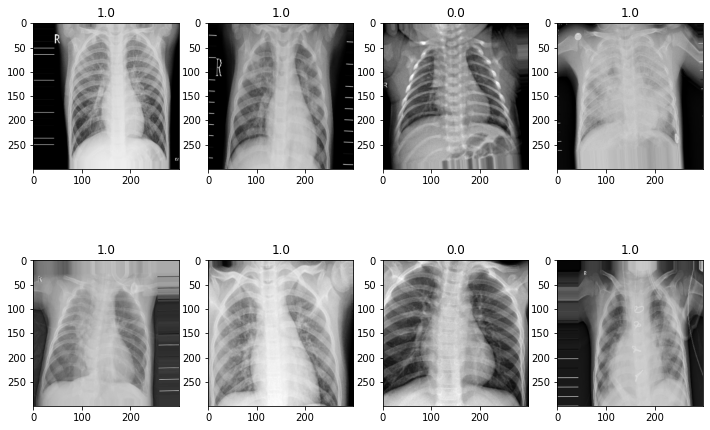

In [ ]:
i=0
for batch in train_dataset:
    plt.figure(figsize=(12,8))
    for j in range(8):
        plt.subplot(2,4,j+1)
        imgplot = plt.imshow(image.array_to_img(batch[0][j]),cmap = 'gray')
        plt.title(batch[1][j])
 
    i+=1
    if i != 0:
        break
        
plt.show()

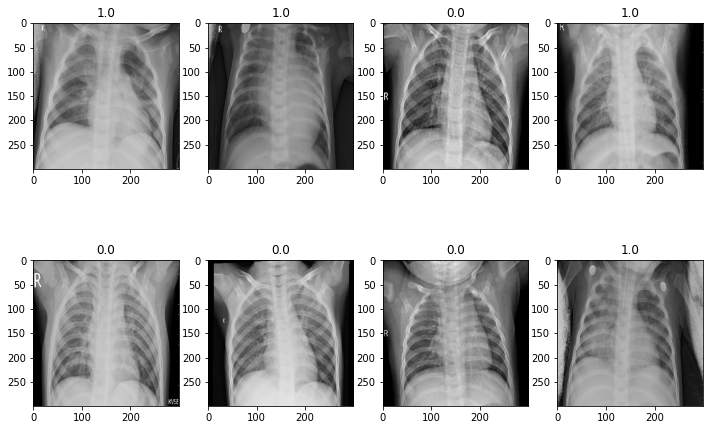

In [ ]:
i=0
for batch in test_dataset:
    plt.figure(figsize=(12,8))
    for j in range(8):
        plt.subplot(2,4,j+1)
        imgplot = plt.imshow(image.array_to_img(batch[0][j]),cmap = 'gray')
        plt.title(batch[1][j])
 
    i+=1
    if i != 0:
        break
        
plt.show()

In [ ]:
train_dataset.image_shape

(300, 300, 1)

In [ ]:
train_dataset[0]

(array([[[[0.09019608],
          [0.09019608],
          [0.09019608],
          ...,
          [0.26942173],
          [0.28169295],
          [0.24921137]],
 
         [[0.09019608],
          [0.09019608],
          [0.09019608],
          ...,
          [0.2693735 ],
          [0.28174117],
          [0.2492837 ]],
 
         [[0.09019608],
          [0.09019608],
          [0.09019608],
          ...,
          [0.2693253 ],
          [0.2817894 ],
          [0.24935605]],
 
         ...,
 
         [[0.11764707],
          [0.11764707],
          [0.11764707],
          ...,
          [0.4556922 ],
          [0.39481363],
          [0.34900188]],
 
         [[0.11764707],
          [0.11764707],
          [0.11764707],
          ...,
          [0.45549932],
          [0.39465687],
          [0.3489898 ]],
 
         [[0.11764707],
          [0.11764707],
          [0.11764707],
          ...,
          [0.45530644],
          [0.39450017],
          [0.34897777]]],
 
 
        [

creating a CNN with softmax


In [ ]:
cnn=models.Sequential([
                       #cnn
                       layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu',input_shape=(300,300,1)),
                       layers.MaxPooling2D((2,2)),
                
                      
                       layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu'),
                       layers.MaxPooling2D((2,2)),


                       layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu'),
                       layers.MaxPooling2D((2,2)),


                       layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu'),
                       layers.MaxPooling2D((2,2)),
                      
                        
                    

                       #dense
                       layers.Flatten(),
                       layers.Dense(100,activation='relu'),
                       layers.Dense(50,activation='relu'),
                       layers.Dense(10,activation='relu'),
                       layers.Dense(1,activation='softmax'),
])     



cnn.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [ ]:
cnn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 298, 298, 32)      320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 149, 149, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 147, 147, 32)      9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 73, 73, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 71, 71, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 35, 35, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 33, 33, 32)        9

In [ ]:
model = cnn.fit(
    train_dataset,
    validation_data = val_dataset,
    epochs =20 ,
)

Epoch 1/20
164/164 [==============================] - 1634s 10s/step - loss: 0.4272 - accuracy: 0.7416 - val_loss: 0.6851 - val_accuracy: 0.5000
Epoch 2/20
164/164 [==============================] - 77s 469ms/step - loss: 0.2748 - accuracy: 0.7416 - val_loss: 0.5824 - val_accuracy: 0.5000
Epoch 3/20
164/164 [==============================] - 75s 460ms/step - loss: 0.2245 - accuracy: 0.7416 - val_loss: 0.8269 - val_accuracy: 0.5000
Epoch 4/20
164/164 [==============================] - 75s 457ms/step - loss: 0.1932 - accuracy: 0.7416 - val_loss: 1.0619 - val_accuracy: 0.5000
Epoch 5/20
164/164 [==============================] - 75s 457ms/step - loss: 0.1790 - accuracy: 0.7416 - val_loss: 0.4764 - val_accuracy: 0.5000
Epoch 6/20
164/164 [==============================] - 75s 458ms/step - loss: 0.1734 - accuracy: 0.7416 - val_loss: 0.3512 - val_accuracy: 0.5000
Epoch 7/20
164/164 [==============================] - 75s 456ms/step - loss: 0.1664 - accuracy: 0.7416 - val_loss: 0.4587 - val_ac

In [ ]:
 cnn.evaluate(test_dataset)

20/20 [==============================] - 5s 247ms/step - loss: 0.3951 - accuracy: 0.6250


[0.39510059356689453, 0.625]

CNN Using Sigmoid function

In [ ]:
cnn_sig=models.Sequential([
                       #cnn
                       layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu',input_shape=(300,300,1)),
                       layers.MaxPooling2D((2,2)),
                
                      
                       layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu'),
                       layers.MaxPooling2D((2,2)),


                       layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu'),
                       layers.MaxPooling2D((2,2)),


                       layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu'),
                       layers.MaxPooling2D((2,2)),
                      
                        
                    

                       #dense
                       layers.Flatten(),
                       layers.Dense(100,activation='relu'),
                       layers.Dense(50,activation='relu'),
                       layers.Dense(10,activation='relu'),
                       layers.Dense(1,activation='sigmoid'),
])     



cnn_sig.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [ ]:
cnn_sig.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 298, 298, 32)      320       
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 149, 149, 32)      0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 147, 147, 32)      9248      
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 73, 73, 32)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 71, 71, 32)        9248      
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 35, 35, 32)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 33, 33, 32)       

In [ ]:
model_2 = cnn_sig.fit(
    train_dataset,
    validation_data = val_dataset,
    epochs =20 ,
)

Epoch 1/20
164/164 [==============================] - 3052s 19s/step - loss: 0.4057 - accuracy: 0.8151 - val_loss: 0.6069 - val_accuracy: 0.7500
Epoch 2/20
164/164 [==============================] - 99s 600ms/step - loss: 0.2881 - accuracy: 0.8812 - val_loss: 0.4945 - val_accuracy: 0.7500
Epoch 3/20
164/164 [==============================] - 100s 607ms/step - loss: 0.2359 - accuracy: 0.9061 - val_loss: 0.4052 - val_accuracy: 0.8125
Epoch 4/20
164/164 [==============================] - 100s 609ms/step - loss: 0.2181 - accuracy: 0.9172 - val_loss: 0.7013 - val_accuracy: 0.6875
Epoch 5/20
164/164 [==============================] - 99s 604ms/step - loss: 0.1975 - accuracy: 0.9235 - val_loss: 1.3796 - val_accuracy: 0.5625
Epoch 6/20
164/164 [==============================] - 99s 601ms/step - loss: 0.1817 - accuracy: 0.9315 - val_loss: 0.6743 - val_accuracy: 0.6250
Epoch 7/20
164/164 [==============================] - 100s 611ms/step - loss: 0.1736 - accuracy: 0.9315 - val_loss: 0.8259 - val

In [ ]:
 cnn_sig.evaluate(test_dataset)

20/20 [==============================] - 360s 19s/step - loss: 0.2199 - accuracy: 0.9199


[0.21993088722229004, 0.9198718070983887]